In [1]:
from skimage.measure import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

In [2]:
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    
    return err

In [3]:
def compare_images(imageA,imageB, title):
    # compute mean squared error and structural similarity
    # index for the images
    m = mse(imageA, imageB)
    s = ssim(imageA,imageB)
    
    # setup the figure
    fig = plt.figure(title)
    plt.suptitle("MSE: %.2f, SSIM %.2f" % (m, s))
    
    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")
    
    # show second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")
    
    # show images
    plt.show()
    fig.savefig(r'home/cparr/fig_'+title+'.png', dpi = 300, bbox_inches='tight')

In [9]:
measured = cv2.imread(r'/home/cparr/Downloads//watertrack_obs.png')
model = cv2.imread(r'home/cparr/Downloads//watertrack_model.png')

In [21]:
# error with cvtColor in current version
#measured = cv2.cvtColor(measured, cv2.COLOR_RGB2GRAY)
#model = cv2.cvtColor(model, cv2.COLOR_RGB2GRAY)

#compare_images(measured,model, "watertrack")

error: -------src-dir-------/opencv-2.4.10/modules/imgproc/src/color.cpp:3739: error: (-215) scn == 3 || scn == 4 in function cvtColor


TypeError: Image data can not convert to float

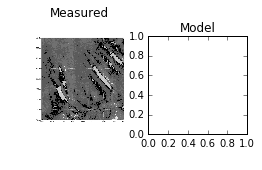

In [22]:
# initialize the figure
fig = plt.figure("Images")
images = ("Measured", measured), ("Model", model)
 
# loop over the images
for (i, (name, image)) in enumerate(images):
    # show the image
    ax = fig.add_subplot(1, 3, i + 1)
    ax.set_title(name)
    plt.imshow(image, cmap = plt.cm.gray)
    plt.axis("off")
    

# show the figure
plt.show()
 
# compare the images
compare_images(measured, measured, "measured vs. measured")
compare_images(measured, model, "measured vs. model")